## **Tanzanian Water Wells Prediction**


![Alt text](well-img.jpg)

## Business Understanding 

### Problem Statement 

Tanzania is an East African country situated south of the Equator . Tanzania National Bureau of Statistics estimates a population of 61.8 million people. A publication done by World Bank estimates that 61% of the population has acces to basic water supply , this has been made possible through programs such as the Water Sector Development Program, since the commencement of the project, Tanzania has made significant progress towards access to water, sanitation and hygiene services, half the population now has access to clean water in the rainy season and two-thirds of the population during the dry season.

Despite the significant progress made, a considerable amount of the population still suffers from adverse effects of inadequate water supply and sanitation. Tanzania has had to contend  with death and disease as an immediate consequence of this with the burden falling heaviest on women, children, the poor and the vulnerable. 

The UN-Habitat in partnership with government wants to set up an initiative to curb this problem by looking into faultiness of water pumps in existing water wells. Some water pumps are functional but in need of maintenance while others are simply non-functional. 

My task as a data scientist is to be able to locate patterns in non-fuctional wells with the aim of providing insights on the core factors to consider while building the wells. These patterns will enable our stakeholders to accurately predict water pumps that need maintenance and water points that the stakeholders should chanel their resources to.


### Objectives
* To identify the patterns in functional and non-functional wells.

* To identify features to consider when building wells.

* To predict the functionality of a well based on the features provided.


### Evaluation Metrics for Success

1. Have a recall score of 84% and above 

2. Have an accuracy score of 92% and above 

## Data Understanding

Load Libraries 

In [161]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE 


Load Data

In [162]:
# loading training set values and training set labels data

def read_data(path):

    data = pd.read_csv(path)

    return data

df_1 = read_data(r'C:\Users\user\Documents\Tanzania Water Wells\training set values.csv')
df_2 = read_data(r'C:\Users\user\Documents\Tanzania Water Wells\training set labels.csv')

In [163]:
# combining the two datasets 

def combined_dataframe(data_0, data_1):

    new_df = data_0.set_index('id').join(data_1.set_index('id'))

    return new_df

df = combined_dataframe(df_1, df_2)
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [164]:
# checking the columns of our dataset

def read_columns(data):

    columns = data.columns

    return columns
    

read_columns(df)

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [165]:
# previewing the shape and information of our dataframe 

def get_info_shape(data):

    print(f'The shape of our dataset is: {data.shape}')
    print(f'with {data.shape[0]} number of rows')
    print(f'and {data.shape[1]} columns')
    print('********************************************************')
    print('********************************************************')
    print(data.info())

    
get_info_shape(df)   

The shape of our dataset is: (59400, 40)
with 59400 number of rows
and 40 columns
********************************************************
********************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region    

In [166]:
# statistical analysis of our dataset 
def statistical_analysis(data):
    return data.describe()

statistical_analysis(df)

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [167]:
# checking to see the data types in our dataset  

def data_types(data):

    print("Our dataset has", len( data.select_dtypes(include='number').columns),
                "numeric columns")
    
    print("and", len(data.select_dtypes(include='object').columns),
          "categorical columns")

    print('Numerical Columns: ', data.select_dtypes(include='number').columns)
    print('Categorical Coulumns: ', data.select_dtypes(include='object').columns)

data_types(df) 

Our dataset has 9 numeric columns
and 31 categorical columns
Numerical Columns:  Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'construction_year'],
      dtype='object')
Categorical Coulumns:  Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')


From the analysis we have been doing, the number of rows we have favors our modelling. The longer your data the better. We have a total of 40 columns 9 of which have numerical data while 31 columns have categorical data 

* Numerical Columns

>> amount_tsh : Total static head(amount of water availabe to waterpoint)

>> gps_height : Altitude of the well

>> longitude : GPS coordinate

>> latitude : GPS coordinate

>> num_private : number of privately owned water points

>> region_code : Geographic location(coded)

>> district_code : Geographic location(coded)

>> population : population around the well

>> construction_year : Year the waterpoint was constructed

* Categorical Columns 

>> data_recorded : data of observation

>> installer : Organization that installed the well

>> funder : Who funded the well

>> wpt_name : Name of the waterpoint if there is one

>> basin : Geographic water basin

>> subvillage : Geographic location

>> region : Geographic location

>> lga : Local Government Area

>> ward : Geographic Location

>> public_meeting - True/False

>> recorded_by : Group entering this row of data

>> scheme_management : Who operates the waterpoint

>> scheme_name : Who operates the waterpoint

>> permit : If the waterpoint is permitted

>> extraction_type : The kind of extraction the waterpoint uses

>> extraction_type_group : The kind of extraction the waterpoint uses

>> extraction_type_class : The kind of extraction the waterpoint uses

>> management : How the waterpoint is managed

>> management_group : How the waterpoint is managed

>> payment : What the water costs

>> payment_type : What the water costs

>> water_quality : The quality of the water

>> quality_group : The quality of the water

>> quantity : The quantity of water

>> quantity_group : The quantity of water

>> source : The source of the water

>> source_type : The source of the water

>> source_class : The source of the water

>> waterpoint_type : The kind of waterpoint

>> waterpoint_type_group : The kind of waterpoint

>> status_group : The condition of the wells (target variable)


## Data Cleaning

### Duplicates 

In [168]:
# function to check for duplicates

duplicates = []

def check_duplicates(data):
    for i in data.duplicated():
        duplicates.append(i)
    duplicates_set = set(duplicates)
    if(len(duplicates_set) == 1):
        print('Our Dataset has no Duplicates')

    else:
        duplicates_percentage = np.round(((sum(duplicates)/len(data)) * 100 ), 2)
        print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')
        

check_duplicates(df)

Duplicated rows constitute of 0.06 % of our dataset


In [169]:
# dropping duplicated values 

def drop_duplicates(data):
    data = data.drop_duplicates(inplace = True)
    return data

drop_duplicates(df)

In [170]:
""" Simple function to just check the shape of our DataFrame"""

def shape(data):
    data_shape = data.shape
    return data_shape

shape(df)

(59364, 40)

### Outliers 

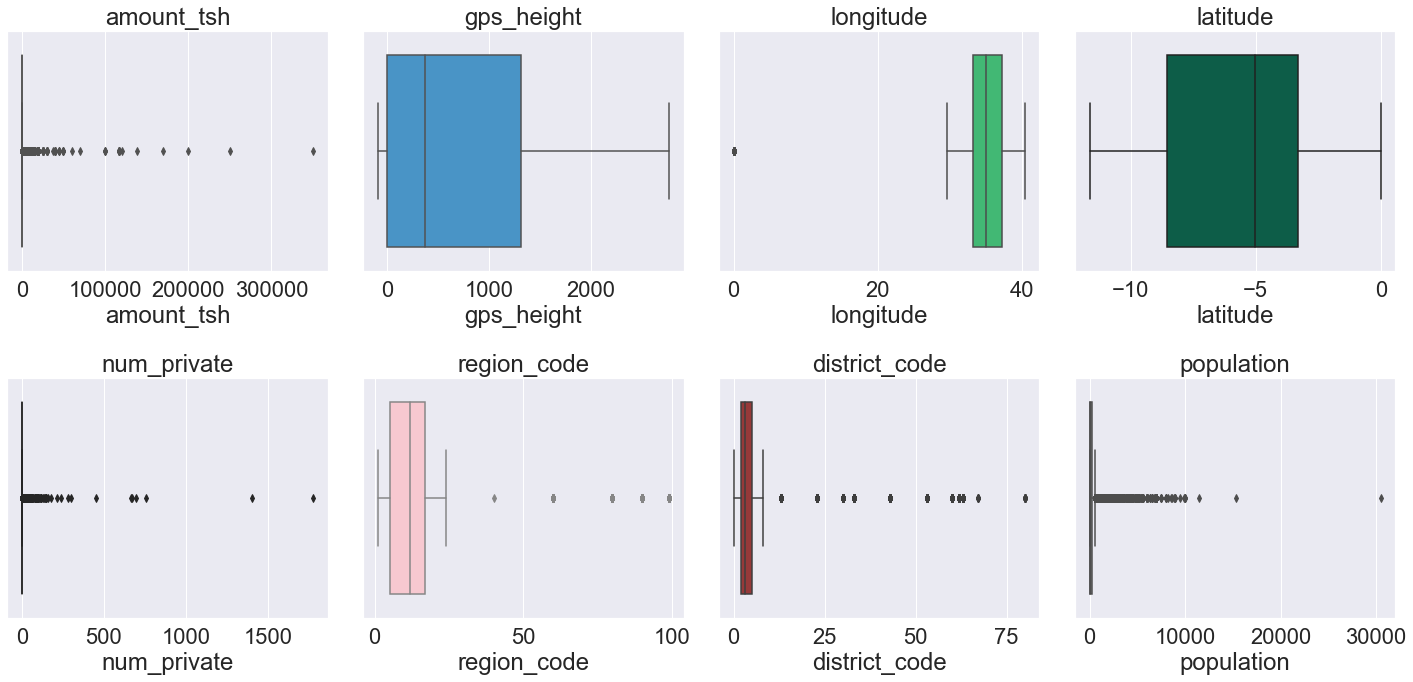

In [171]:
# visualizing outliers in our numerical data
 
def plot_boxplots(data, cols):
    fig, axes = plt.subplots(2, 4, figsize=(20,10))
    axes = axes.ravel()
    sns.set(font_scale=2.0)

    colors = ["#9b59b6", "#3498db", "#2ecc71", "#006a4e", 'purple', 'pink', 'brown', 'gray']

    for i, col in enumerate(cols[:8]):

        # convert the x-axis variable to a numeric data type
        
        data[col] = data[col].astype(float)
        sns.boxplot(x=data[col], ax=axes[i], color=colors[i])
        
        axes[i].set_title(col)
    plt.tight_layout()

# specify the columns to plot

cols = df.select_dtypes(include='number').columns

# call the plot_boxplots function

plot_boxplots(df, cols)

As per our visualization we see that we have outliers present in the amount_tsh column, num_private column, region and district code column and the population. Amount Total Static Head (amount_tsh), static measures the total vertical distance that a pump raises water. Total Static Head refers to the vertical height of a stationary column of liquid produced by a pump, measured from the suction level. In simpler terms we can also say its the pressure at a specific point in the system 


![Alt text](total%20static%20head.jpg)

The oultiers on the amount_tsh are valid . There are a true reflection of the pressure a water pump can generate. It is possibe to even have a Total Static Head of 350000.0 which is the maximum value on the column. Therefore we will not be removing any outliers from this column.

The population column shares in the same aspect as the amount_tsh column, its possible to have a population of 30,000 individuals in a region. Therefore we will not be removing any outliers

We will not delve much into the region code and the division code, these are international standard denomination for country subdivisions that have already been established 

For the num_private column we will further explore our data to determine whether the outliers are valid.

## Missing Values 

In [172]:
def missing_values(data):
    missing_values = data.isnull().sum().sort_values(ascending=False)
    missing_val_percent = ((data.isnull().sum()/len(data)).sort_values(ascending=False))
    """ creating a dataframe containing missing values and their percentages """
    missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage %': missing_val_percent})
    
    return missing_df[missing_df['Percentage %'] > 0]

missing_values(df)


,Missing Values,Percentage %
scheme_name,28139,0.474008
scheme_management,3877,0.065309
installer,3655,0.061569
funder,3635,0.061232
public_meeting,3314,0.055825
permit,3056,0.051479
subvillage,371,0.006250


We will only be focusing on the missing values in columns scheme_name, scheme_management, installer, funder and public meeting. Lets' start 

### Scheme Name and Scheme Management 
The main objective of our project is to be able to indetify patterns in our datasets that will enable us predict faulty water pumps. These two features do not contribute towards that . They only information they give us is what to call the scheme and who manages it, this is not enugh to identify whether we have a faulty water pumps. For this reason, we will go ahead and drop this columns. In addition to that scheme name contains about 47 percentage of missing values , which is almost half our dataset. Its only correct we drop the column

In [173]:
# dropping the columns 

def dropping_columns(columns):
    drop_column = df.drop(columns=columns, inplace = True)
    return drop_column

columns_to_drop = df[['scheme_name', 'scheme_management']]

dropping_columns(columns_to_drop)

In [174]:
# check to see the shape of our dataset after dropping the columns

shape(df)

(59364, 38)

### Installer

The percentage of missing data in this column is quite low. After analysing and successfully creating predictions from our dataset. we are to generate reccomendations to our stakeholders. Such reccomendation may be advising our stakeholders on the best contractor to do installation of the water pumps. Installers can greatly contribute to the durability of water pumps. Factors such as seating, damaged seal, or misaligned gasket can mean the water pump is not operating efficienty. Therefore reccomending a list of installers is commendable here. In this case we will only drop the rows with the missing values

### Funder 
This refers to the organisation that donated the pumps. We want to advise our stakeholder on who it should collaborate with to raise maximum funds towards the initiative therfore we will just drop the rows with the missing values

### Public Meeting

Public meetings are a way of the community to come together and raise issues of concern. We will also just missing values of the columns


In [175]:
# removing rows with missing values from columns installer, funder and public_meeting

def drop_rows(data, columns):
    new_data = data.dropna(subset=columns, inplace=True)
    return new_data

col = ['installer', 'funder', 'public_meeting']
drop_rows(df, col)

In [176]:
# previewing new shape 
shape(df)

(52560, 38)

### Irrelevant Columns

The following columns do not seem relevant to our business problem and therefore we will go ahead and drop them
1. Permit
2. Subvillage
3. wpt_name
4. region_code
5. district_code
6. lga
7. ward
8. recorded_by
9. date_recorded 
Note : we will be using latitudes and longitudes to map our regions therefore we do not need additional columns with geographical location information

Some columns are good for exploratory data analysis just to get a feel of how our data is , we will not be dropping those however we will not use them during modelling 

In [177]:
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [178]:
irrelevant_columns = df[['permit', 'subvillage', 'wpt_name', 'region_code', 'district_code', 'lga', 'ward', 'recorded_by', 'date_recorded']]

# calling the drop column function and passing the irrelevant columns

dropping_columns(irrelevant_columns)

In [179]:
# preview the shape of our dataset
shape(df)

(52560, 29)

Now that we have cleaned our dataset, Lets take a look at our columns to see if we have columns with the similar information, check for misspellings on our dataset, check for whitespaces, check to rename. Let's start with columns that appear to have the same information

In [180]:
df.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'num_private', 'basin', 'region', 'population',
       'public_meeting', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

### Payment and Payment Type

In [181]:
# tallying up unique responses in our dataset 

def tally(column):

    groupings = column.value_counts()

    return groupings

print(tally(df.payment))
print('**************************************')
print('**************************************')
print(tally(df.payment_type))

never pay                22712
pay per bucket            8311
pay monthly               8009
unknown                   5205
pay when scheme fails     3850
pay annually              3513
other                      960
Name: payment, dtype: int64
**************************************
**************************************
never pay     22712
per bucket     8311
monthly        8009
unknown        5205
on failure     3850
annually       3513
other           960
Name: payment_type, dtype: int64


The totals for payment and payment type are the same, to mean these two columns represent the same information. Therefore we shall drop one column

In [182]:
# dropping payment column

payment_col = df[['payment']]

dropping_columns(payment_col)


In [183]:
# preview shape of dataframe

shape(df)

(52560, 28)

### Water Quality and Quality Group


In [184]:
print(tally(df.water_quality))
print('**************************************')
print('**************************************')
print(tally(df.quality_group))

soft                  45598
salty                  4429
unknown                1009
milky                   717
coloured                379
salty abandoned         239
fluoride                173
fluoride abandoned       16
Name: water_quality, dtype: int64
**************************************
**************************************
good        45598
salty        4668
unknown      1009
milky         717
colored       379
fluoride      189
Name: quality_group, dtype: int64


Both these columns contain information about water quality.Notice that quality group combined both flouride and flouride abandoned to form just flouride, it did the same to salty and salty abandoned to form just salty. Water quality gives us a good subdivision of the water quality as opposed to quality group,therefore its only wise to keep the column and drop quality group 


In [185]:
# dropping quality_group
quality_grp = df[['quality_group']]

dropping_columns(quality_grp)

In [186]:
# preview shape

shape(df)

(52560, 27)

### Quantity and Quantity Group

In [187]:
print(tally(df.quantity))
print('**************************************')
print('**************************************')
print(tally(df.quantity_group))

enough          30156
insufficient    13413
dry              5367
seasonal         3235
unknown           389
Name: quantity, dtype: int64
**************************************
**************************************
enough          30156
insufficient    13413
dry              5367
seasonal         3235
unknown           389
Name: quantity_group, dtype: int64


Both the columns have the same information with the same totals.We then choose one

In [188]:
quantity_grp = df[['quantity_group']]

dropping_columns(quantity_grp)

In [189]:
# preview shape

shape(df)

(52560, 26)

### Source and Source Type Source class

In [190]:
print(tally(df.source))
print('**************************************')
print('**************************************')
print(tally(df.source_type))
print('**************************************')
print('**************************************')
print(tally(df.source_class))


spring                  15236
shallow well            15037
machine dbh              9506
river                    8646
rainwater harvesting     1894
hand dtw                  784
lake                      624
dam                       603
other                     195
unknown                    35
Name: source, dtype: int64
**************************************
**************************************
spring                  15236
shallow well            15037
borehole                10290
river/lake               9270
rainwater harvesting     1894
dam                       603
other                     230
Name: source_type, dtype: int64
**************************************
**************************************
groundwater    40563
surface        11767
unknown          230
Name: source_class, dtype: int64


The three columns all have information about water sources. The column source howver has one entry called machine dbh that is quite to decipher, the column source_type gives us an indepth breakdown of the water source and its quite easy to understand each source.The column source class just gives us as general overview of water source. We will go ahead and make use of the column source_type since its more clear than the other two 


In [191]:
# dropping columns source and source class
water_source_col = df[['source', 'source_class']]

dropping_columns(water_source_col)

In [192]:
# preview shape
shape(df)

(52560, 24)

### Water point and Water point type group 

In [193]:
print(tally(df.waterpoint_type))
print('**************************************')
print('**************************************')
print(tally(df.waterpoint_type_group))


communal standpipe             24544
hand pump                      15777
communal standpipe multiple     5778
other                           5617
improved spring                  730
cattle trough                    107
dam                                7
Name: waterpoint_type, dtype: int64
**************************************
**************************************
communal standpipe    30322
hand pump             15777
other                  5617
improved spring         730
cattle trough           107
dam                       7
Name: waterpoint_type_group, dtype: int64


There is no much difference between the two columns only that column waterpoint_type has split the type of communal standpipe while water_point_type_group has combined them both .
We will go ahead and pick waterpoint_type

In [194]:
waterpoint_type_col = df[['waterpoint_type_group']]

dropping_columns(waterpoint_type_col)

In [195]:
# preview shape
shape(df)

(52560, 23)

### Management and Management Type

In [206]:
print(tally(df.management))
print('**************************************')
print('**************************************')
print(tally(df.management_group))


vwc                 36424
wug                  5516
water board          2674
wua                  2295
private operator     1655
parastatal           1371
water authority       810
other                 682
company               662
unknown               295
other - school         99
trust                  77
Name: management, dtype: int64
**************************************
**************************************
user-group    46909
commercial     3204
parastatal     1371
other           781
unknown         295
Name: management_group, dtype: int64


We will go ahead and choose management column

In [207]:
# dropping management_group
management_group_col = df[['management_group']]

dropping_columns(management_group_col)

### Extraction Type , Extraction Type Group and Extraction Type Class

In [208]:
print(tally(df.extraction_type))
print('**************************************')
print('**************************************')
print(tally(df.extraction_type_class))
print('**************************************')
print('**************************************')
print(tally(df.extraction_type_group))



gravity                      23759
nira/tanira                   7231
other                         5597
submersible                   3913
swn 80                        3431
mono                          2514
india mark ii                 2257
afridev                       1522
ksb                           1334
other - rope pump              344
other - swn 81                 206
windmill                       111
cemo                            90
india mark iii                  88
other - play pump               84
walimi                          46
climax                          32
other - mkulima/shinyanga        1
Name: extraction_type, dtype: int64
**************************************
**************************************
gravity         23759
handpump        14866
other            5597
submersible      5247
motorpump        2636
rope pump         344
wind-powered      111
Name: extraction_type_class, dtype: int64
**************************************
*********************

We will go ahead and remain with extraction type group column

In [211]:
# dropping extraction type and extraction type column

extraction_col = df[['extraction_type', 'extraction_type_class']]

dropping_columns(extraction_col)

Now that we have combined we have sorted columns that seem to have similar information lets explore other columns of our remaining dataset

Num Private

In [196]:
print(tally(df.num_private))

0.0       51836
6.0          73
1.0          68
8.0          46
5.0          44
32.0         40
45.0         36
15.0         35
39.0         30
93.0         28
3.0          26
7.0          24
65.0         22
47.0         21
102.0        20
4.0          19
2.0          18
17.0         17
80.0         15
20.0         14
25.0         12
11.0         10
34.0         10
41.0         10
16.0          8
120.0         7
150.0         6
22.0          6
50.0          5
24.0          5
12.0          5
9.0           4
38.0          4
58.0          4
14.0          3
10.0          3
27.0          2
26.0          2
672.0         1
131.0         1
450.0         1
23.0          1
213.0         1
668.0         1
87.0          1
35.0          1
42.0          1
141.0         1
755.0         1
94.0          1
180.0         1
240.0         1
1776.0        1
300.0         1
60.0          1
280.0         1
698.0         1
55.0          1
62.0          1
1402.0        1
Name: num_private, dtype: int64


There is no clear information about the column num_private entails and most of the the observations are zero , therefore we will go ahead and drop the column

In [197]:
num_private_col = df[['num_private']]

dropping_columns(num_private_col)


Funder

In [232]:
df['funder'].fillna(value='Unknown',inplace=True)
df['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)

Installer 

In [ ]:
df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                  'District Council','Council','Counc','District  Council','Distri'),
                                 value ='District council' , inplace=True)

df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                   'RC CATHORIC',) , value ='RC Church' , inplace=True)

df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                    'central government','Cental Government', 'Cebtral Government', 
                                  'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                    'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                    'Centra govt') , value ='Central government' , inplace=True)

df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                      value ='world vision' , inplace=True)

df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                    'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                    'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                    'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                    'Village Office','Village community members'),
                                     value ='villagers' , inplace=True)

df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                      value ='Community' , inplace=True)
df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [233]:
df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [234]:
shape(df)

(52560, 19)

We are done with cleaning our dataset now let's move to Explatory Data Analysis

## Explatory Data Analysis 

# Class Distribution on World Map

Text(0.5, 1.0, 'Targets Distribution')

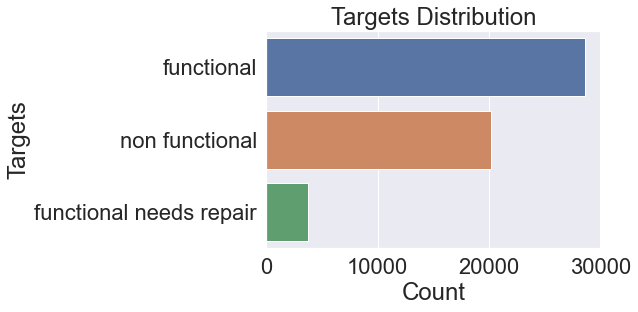

In [239]:
target_counts = df['status_group'].value_counts()
ax = sns.barplot(y=target_counts.index, x=target_counts.values)
ax.set_xlabel('Count')
ax.set_ylabel('Targets')
ax.set_title('Targets Distribution')